In [1]:
import smogn

In [8]:
import pandas as pd
import seaborn as sb

# Background + Intuition

In [3]:
housing = pandas.read_csv(
    "https://raw.githubusercontent.com/nickkunz/smogn/master/data/housing.csv"
)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
housing.shape

(1460, 81)

In [6]:
housing_smogn = smogn.smoter(
    data = housing, 
    y = "SalePrice"
)

In [7]:
housing_smogn.shape

(1244, 62)

by default, smogn.smoter will first automatically remove columns containing missing values and then remove rows, as it cannot input data containing missing values. This feature can be changed with the boolean arguments drop_na_col = False and drop_na_rows = False.

In [9]:
housing_smogn.head(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,348,60,FV,12149,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2009,WD,Normal,252723
1,1064,60,RL,10435,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2009,WD,Normal,252749
2,231,59,FV,8022,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,1,6,2009,WD,Normal,254850
3,217,59,FV,8577,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,255396
4,691,60,RL,10285,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2008,WD,Normal,260541


In this example, the regions of interest within the response variable y are automatically determined by the box plot extremes. The extreme values are considered rare "minorty" values are over-sampled. The values closer the median are considered "majority" values and are under-sampled.

In [10]:
## box plot stats - original data 
smogn.box_plot_stats(housing['SalePrice'])['stats']

array([ 34900., 129950., 163000., 214000., 340000.])

In [11]:
## box plot stats - modified data
smogn.box_plot_stats(housing_smogn['SalePrice'])['stats']

array([ 39300., 165000., 264477., 317262., 538265.])

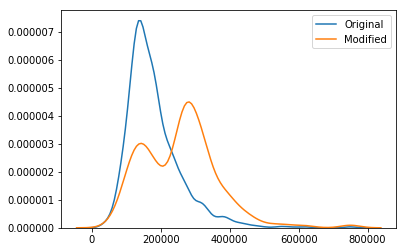

In [12]:
## plot y distribution 
# Fit and plot a univariate or bivariate kernel density estimate.
sb.kdeplot(housing['SalePrice'], label = "Original")
sb.kdeplot(housing_smogn['SalePrice'], label = "Modified")

the distribution of the response variable has skewed right when compared to the original training set.

# Parameter

k specifies the number of neighbors to consider for interpolation used in over-sampling. default is 5

The pert argument takes a real number between 0 and 1. It represents the amount of perturbation to apply to the introduction of Gaussian Noise. In this example, we input 0.04 to increase the noise generated by synthetic examples where applicable (default is 0.02). 

samp_method argument takes a string, either 'balance' or 'extreme'. If 'balance' is specified, less over/under-sampling is conducted. If 'extreme' is specified, more over/under-sampling is conducted. 

The drop_na_col and drop_na_row arguments take a boolean. They specify whether or not to automatically remove features (columns) and observations (rows) that contain missing values (default is True for both). 

The replace argument takes a boolean. It specifies whether or not to utilize replacement in under-sampling (default is False).

The rel_thres argument takes a real number between 0 and 1. It specifies the threshold of rarity. The higher the threshold, the higher the over/under-sampling boundary.

The rel_method argument takes a string, either 'auto' or 'manual'. It specifies how relevant or rare "minority" values in y are determined. If 'auto' is specified, "minority" values are automatically determined by box plot extremes. If 'manual' is specified, "minority" values are determined by the user.

The rel_xtrm_type argument takes a string, either 'low' or 'both' or 'high'. It indicates which region of the response variable y should be considered rare or a "minority", when rel_method = 'auto'.

The rel_ctrl_pts_rg argument takes a 2d array (matrix). It is used to manually specify the regions of interest or rare "minority" values in y. The first column indicates the y values of interest, the second column indicates a mapped value of relevance, either 0 or 1, where 0 is the least relevant and 1 is the most relevant, and the third column is indicative. It will be adjusted afterwards, use 0 in most cases.

The rel_coef argument takes a positive real number. It specifies the box plot coefficient used to automatically determine extreme and therefore rare "minority" values in y, when rel_method = 'auto'.

In [14]:
housing_smogn2 = smogn.smoter(
    
    ## main arguments
    data = housing,           ## pandas dataframe
    y = 'SalePrice',          ## string ('header name')
    k = 9,                    ## positive integer (k < n)
    samp_method = 'extreme',  ## string ('balance' or 'extreme')

    ## phi relevance arguments
    rel_thres = 0.80,         ## positive real number (0 < R < 1)
    rel_method = 'auto',      ## string ('auto' or 'manual')
    rel_xtrm_type = 'high',   ## string ('low' or 'both' or 'high')
    rel_coef = 2.25           ## positive real number (0 < R)
)

In [15]:
housing_smogn2.shape

(2643, 62)

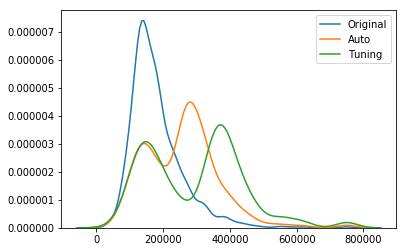

In [16]:
## plot y distribution 
# Fit and plot a univariate or bivariate kernel density estimate.
sb.kdeplot(housing['SalePrice'], label = "Original")
sb.kdeplot(housing_smogn['SalePrice'], label = "Auto")
sb.kdeplot(housing_smogn2['SalePrice'], label = "Tuning")

In [17]:
# specify phi relevance values
rg_mtrx = [

    [35000,  1, 0],  ## over-sample ("minority")
    [125000, 0, 0],  ## under-sample ("majority")
    [200000, 0, 0],  ## under-sample
    [250000, 0, 0],  ## under-sample
]

In [19]:
## conduct smogn
housing_smogn3 = smogn.smoter(
    
    ## main arguments
    data = housing,           ## pandas dataframe
    y = 'SalePrice',          ## string ('header name')
    k = 7,                    ## positive integer (k < n)
    pert = 0.04,              ## real number (0 < R < 1)
    samp_method = 'balance',  ## string ('balance' or 'extreme')
    drop_na_col = True,       ## boolean (True or False)
    drop_na_row = True,       ## boolean (True or False)
    replace = False,          ## boolean (True or False)

    ## phi relevance arguments
    rel_thres = 0.10,         ## real number (0 < R < 1)
    rel_method = 'manual',    ## string ('auto' or 'manual')
    rel_ctrl_pts_rg = rg_mtrx ## 2d array (format: [x, y])
)

In [20]:
housing_smogn3.shape

(1309, 62)

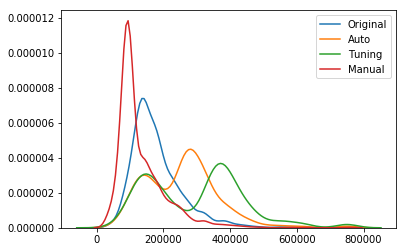

In [21]:
## plot y distribution 
# Fit and plot a univariate or bivariate kernel density estimate.
sb.kdeplot(housing['SalePrice'], label = "Original")
sb.kdeplot(housing_smogn['SalePrice'], label = "Auto")
sb.kdeplot(housing_smogn2['SalePrice'], label = "Tuning")
sb.kdeplot(housing_smogn3['SalePrice'], label = "Manual")